# Construction Cost Prediction Using Linear Regression

### This project focuses on using the linear regression technique to build a cost prediction model that can be used to estimate construction costs during the early phases of a building design project.

## Import necessary libraries ##

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Import dataset
constr_df = pd.read_csv("D:/ADESOYE'S DOCUMENTS/NTU SCHOOL WORK/MSC PROJECT/Collated_Construction_Information_2.csv")

In [3]:
constr_df

,S/N,Project,Project Description,Project Type,Preliminary Cost Estimate(=N=),Preliminary Cost/m2,Initial Contract Sum,Actual Project Cost at Completion,Site Area(m2),Total Gross Floor Area(m2),Total No. of Floors,Floor-to-floor height(m),Ground Floor Area(m2),No of Basements,Total Basement Area(m2),Project Start Date,Project End Date,Planned Project Duration (weeks),Actual Project Duration (weeks),Contractor Grade
0,1,Office Building,Office Block,Commercial,7.500000e+07,NaN,7.455050e+07,7.490000e+07,609.844,648.000,3.0,NaN,216.000,0,0.0,10/02/2017,01/03/2018,48.0,54.857143,NaN
1,2,Residential Development,Block of Residential Apartments,Residential,6.000000e+07,NaN,5.825050e+07,5.825050e+07,4121.560,765.510,2.0,NaN,391.200,0,0.0,29/10/2018,15/04/2019,24.0,24.000000,NaN
2,3,Residential Development,Semi-detached Duplex,Residential,7.500000e+07,120000.0,7.121364e+07,7.186364e+07,726.420,593.447,2.0,NaN,279.761,0,0.0,14/04/2019,01/09/2019,NaN,20.000000,NaN
3,4,Luxury Residential Building Development,8 units of 3bedroom apartments and 4 units of ...,Residential,1.600000e+09,400000.0,1.485000e+09,1.486500e+09,1146.920,3672.200,8.0,3.4,NaN,0,0.0,21/01/2020,03/08/2021,76.0,80.000000,B
4,6,Legislative and democratic studies Building De...,"A complex housing adm block, lecture thearter,...",Institutional,3.600000e+10,NaN,5.400000e+10,5.900000e+10,83000.000,65455.000,NaN,NaN,NaN,2,0.0,14/05/2018,08/05/2023,156.0,260.000000,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,116,Filling station,Commercial,Filling Station,9.324000e+07,180000.0,1.295000e+08,1.392125e+08,1619.000,518.000,2.0,3.0,258.000,0,0.0,30/06/2020,12/09/2020,16.0,24.000000,NaN
113,117,Shopping complex,Commercial,Retail,2.400000e+07,85000.0,6.800000e+07,6.925500e+07,618.000,771.000,3.0,4.0,257.000,0,0.0,30/03/2021,23/10/2021,24.0,28.000000,NaN
114,118,country home,Residential,Residential,2.500000e+07,60000.0,3.000000e+07,3.365790e+07,944.000,206.000,2.0,3.0,153.000,0,0.0,31/05/2021,12/11/2021,24.0,24.000000,NaN
115,119,House,Residential,Residential,2.400000e+07,85000.0,2.700000e+07,2.834586e+07,252.000,224.000,2.0,3.0,112.000,0,0.0,30/11/2021,19/08/2022,36.0,32.000000,NaN


In [4]:
#Check number of rows and columns in the dataset
constr_df.shape

(117, 20)

## Statistical description ##

In [5]:
constr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   S/N                                117 non-null    int64  
 1   Project                            107 non-null    object 
 2   Project Description                107 non-null    object 
 3   Project Type                       117 non-null    object 
 4   Preliminary Cost Estimate(=N=)     64 non-null     float64
 5   Preliminary Cost/m2                51 non-null     float64
 6   Initial Contract Sum               105 non-null    float64
 7   Actual Project Cost at Completion  117 non-null    float64
 8   Site Area(m2)                      85 non-null     float64
 9   Total Gross Floor Area(m2)         117 non-null    float64
 10  Total No. of Floors                116 non-null    float64
 11  Floor-to-floor height(m)           90 non-null     float64

In [6]:
constr_df.describe()

,S/N,Preliminary Cost Estimate(=N=),Preliminary Cost/m2,Initial Contract Sum,Actual Project Cost at Completion,Site Area(m2),Total Gross Floor Area(m2),Total No. of Floors,Floor-to-floor height(m),Ground Floor Area(m2),No of Basements,Total Basement Area(m2),Planned Project Duration (weeks),Actual Project Duration (weeks)
count,117.000000,6.400000e+01,5.100000e+01,1.050000e+02,1.170000e+02,85.000000,117.000000,116.000000,90.000000,77.000000,117.000000,117.000000,108.000000,117.000000
mean,60.897436,1.193280e+09,1.984356e+05,1.188101e+09,1.248745e+09,2448.369388,2151.707207,2.698276,3.311667,432.167079,0.085470,61.488034,38.703704,50.339438
std,34.690848,5.574805e+09,3.657504e+05,6.319422e+09,6.857526e+09,9054.852134,7066.702499,1.794774,0.735460,717.222488,0.361335,575.511988,30.481574,42.156038
min,1.000000,5.000000e+06,3.500000e+04,5.000000e+06,5.240000e+06,68.000000,44.000000,1.000000,2.700000,20.000000,0.000000,0.000000,4.000000,7.000000
25%,31.000000,1.941000e+07,7.000000e+04,3.800000e+07,4.000000e+07,600.000000,286.000000,2.000000,3.000000,112.000000,0.000000,0.000000,20.000000,24.000000
50%,61.000000,5.750000e+07,1.050000e+05,9.300000e+07,9.501204e+07,712.900000,563.400000,2.000000,3.000000,201.000000,0.000000,0.000000,24.000000,33.000000
75%,91.000000,1.800000e+08,1.750000e+05,2.560000e+08,2.726191e+08,1619.000000,1181.360000,3.000000,3.475000,321.210000,0.000000,0.000000,48.000000,64.571429
max,120.000000,3.600000e+10,2.600000e+06,5.400000e+10,5.900000e+10,83000.000000,65455.000000,12.000000,7.200000,4000.000000,2.000000,6198.110000,156.000000,260.000000


In [7]:
constr_df.groupby('Project Type')['Project Type'].agg('count')

Project Type
Agricultural        2
Civic               2
Commercial         19
Educational         7
Filling Station     1
Hotel               6
Institutional       1
Medical             4
Recreational        3
Religious           6
Residential        57
Restaurant          1
Retail              7
Toilet Facility     1
Name: Project Type, dtype: int64

In [8]:
#Check for null values
constr_df.isna().sum()

S/N                                   0
Project                              10
Project Description                  10
Project Type                          0
Preliminary Cost Estimate(=N=)       53
Preliminary Cost/m2                  66
Initial Contract Sum                 12
Actual Project Cost at Completion     0
Site Area(m2)                        32
Total Gross Floor Area(m2)            0
Total No. of Floors                   1
Floor-to-floor height(m)             27
Ground Floor Area(m2)                40
No of Basements                       0
Total Basement Area(m2)               0
Project Start Date                    0
Project End Date                      0
Planned Project Duration (weeks)      9
Actual Project Duration (weeks)       0
Contractor Grade                     84
dtype: int64

In [9]:
constr_df.columns

Index(['S/N', 'Project', 'Project Description', 'Project Type',
       'Preliminary Cost Estimate(=N=)', 'Preliminary Cost/m2',
       'Initial Contract Sum', 'Actual Project Cost at Completion',
       'Site Area(m2)', 'Total Gross Floor Area(m2)', 'Total No. of Floors',
       'Floor-to-floor height(m)', 'Ground Floor Area(m2)', 'No of Basements',
       'Total Basement Area(m2)', 'Project Start Date', 'Project End Date',
       'Planned Project Duration (weeks)', 'Actual Project Duration (weeks)',
       'Contractor Grade'],
      dtype='object')

## Data preprocessing and cleaning ##

In [10]:
#Convert string objects to date
constr_df["Project Start Date"] = pd.to_datetime(constr_df["Project Start Date"], dayfirst = True)
constr_df["Project End Date"] = pd.to_datetime(constr_df["Project End Date"], dayfirst = True)

In [11]:
# convert some columns with float variables to int
constr_df[['Total No. of Floors','No of Basements']] = constr_df[['Total No. of Floors','No of Basements']].fillna(0).apply(np.int64)

In [12]:
#Remove variables with no significant impact on analysis
constr_df_2 = constr_df.drop(['S/N','Project Description','Project','Preliminary Cost/m2','Contractor Grade',
                            'Ground Floor Area(m2)','Preliminary Cost Estimate(=N=)','Site Area(m2)',
                            'Planned Project Duration (weeks)','Initial Contract Sum'], axis=1)

In [13]:
#Fill missing values in columns with mean 
constr_df_2[['Floor-to-floor height(m)']] = constr_df[['Floor-to-floor height(m)']].fillna(constr_df[['Floor-to-floor height(m)']].mean())

In [14]:
#Rename columns
constr_df_2.rename(columns={'Actual Project Cost at Completion': 'Project Completion Cost',
                          'Actual Project Duration (weeks)':'Project Duration (weeks)'}, inplace=True)
constr_df_2.head()

,Project Type,Project Completion Cost,Total Gross Floor Area(m2),Total No. of Floors,Floor-to-floor height(m),No of Basements,Total Basement Area(m2),Project Start Date,Project End Date,Project Duration (weeks)
0,Commercial,7.490000e+07,648.000,3,3.311667,0,0.0,2017-02-10,2018-03-01,54.857143
1,Residential,5.825050e+07,765.510,2,3.311667,0,0.0,2018-10-29,2019-04-15,24.000000
2,Residential,7.186364e+07,593.447,2,3.311667,0,0.0,2019-04-14,2019-09-01,20.000000
3,Residential,1.486500e+09,3672.200,8,3.400000,0,0.0,2020-01-21,2021-08-03,80.000000
4,Institutional,5.900000e+10,65455.000,0,3.311667,2,0.0,2018-05-14,2023-05-08,260.000000


In [15]:
constr_df_2.isna().sum()

Project Type                  0
Project Completion Cost       0
Total Gross Floor Area(m2)    0
Total No. of Floors           0
Floor-to-floor height(m)      0
No of Basements               0
Total Basement Area(m2)       0
Project Start Date            0
Project End Date              0
Project Duration (weeks)      0
dtype: int64

In [16]:
#Check for duplicate values
constr_df_2.duplicated().any()

False

In [17]:
constr_df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Project Type                117 non-null    object        
 1   Project Completion Cost     117 non-null    float64       
 2   Total Gross Floor Area(m2)  117 non-null    float64       
 3   Total No. of Floors         117 non-null    int64         
 4   Floor-to-floor height(m)    117 non-null    float64       
 5   No of Basements             117 non-null    int64         
 6   Total Basement Area(m2)     117 non-null    float64       
 7   Project Start Date          117 non-null    datetime64[ns]
 8   Project End Date            117 non-null    datetime64[ns]
 9   Project Duration (weeks)    117 non-null    float64       
dtypes: datetime64[ns](2), float64(5), int64(2), object(1)
memory usage: 9.3+ KB


In [18]:
constr_df_2.describe()

,Project Completion Cost,Total Gross Floor Area(m2),Total No. of Floors,Floor-to-floor height(m),No of Basements,Total Basement Area(m2),Project Duration (weeks)
count,1.170000e+02,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,1.248745e+09,2151.707207,2.675214,3.311667,0.085470,61.488034,50.339438
std,6.857526e+09,7066.702499,1.804348,0.644207,0.361335,575.511988,42.156038
min,5.240000e+06,44.000000,0.000000,2.700000,0.000000,0.000000,7.000000
25%,4.000000e+07,286.000000,2.000000,3.000000,0.000000,0.000000,24.000000
50%,9.501204e+07,563.400000,2.000000,3.300000,0.000000,0.000000,33.000000
75%,2.726191e+08,1181.360000,3.000000,3.311667,0.000000,0.000000,64.571429
max,5.900000e+10,65455.000000,12.000000,7.200000,2.000000,6198.110000,260.000000


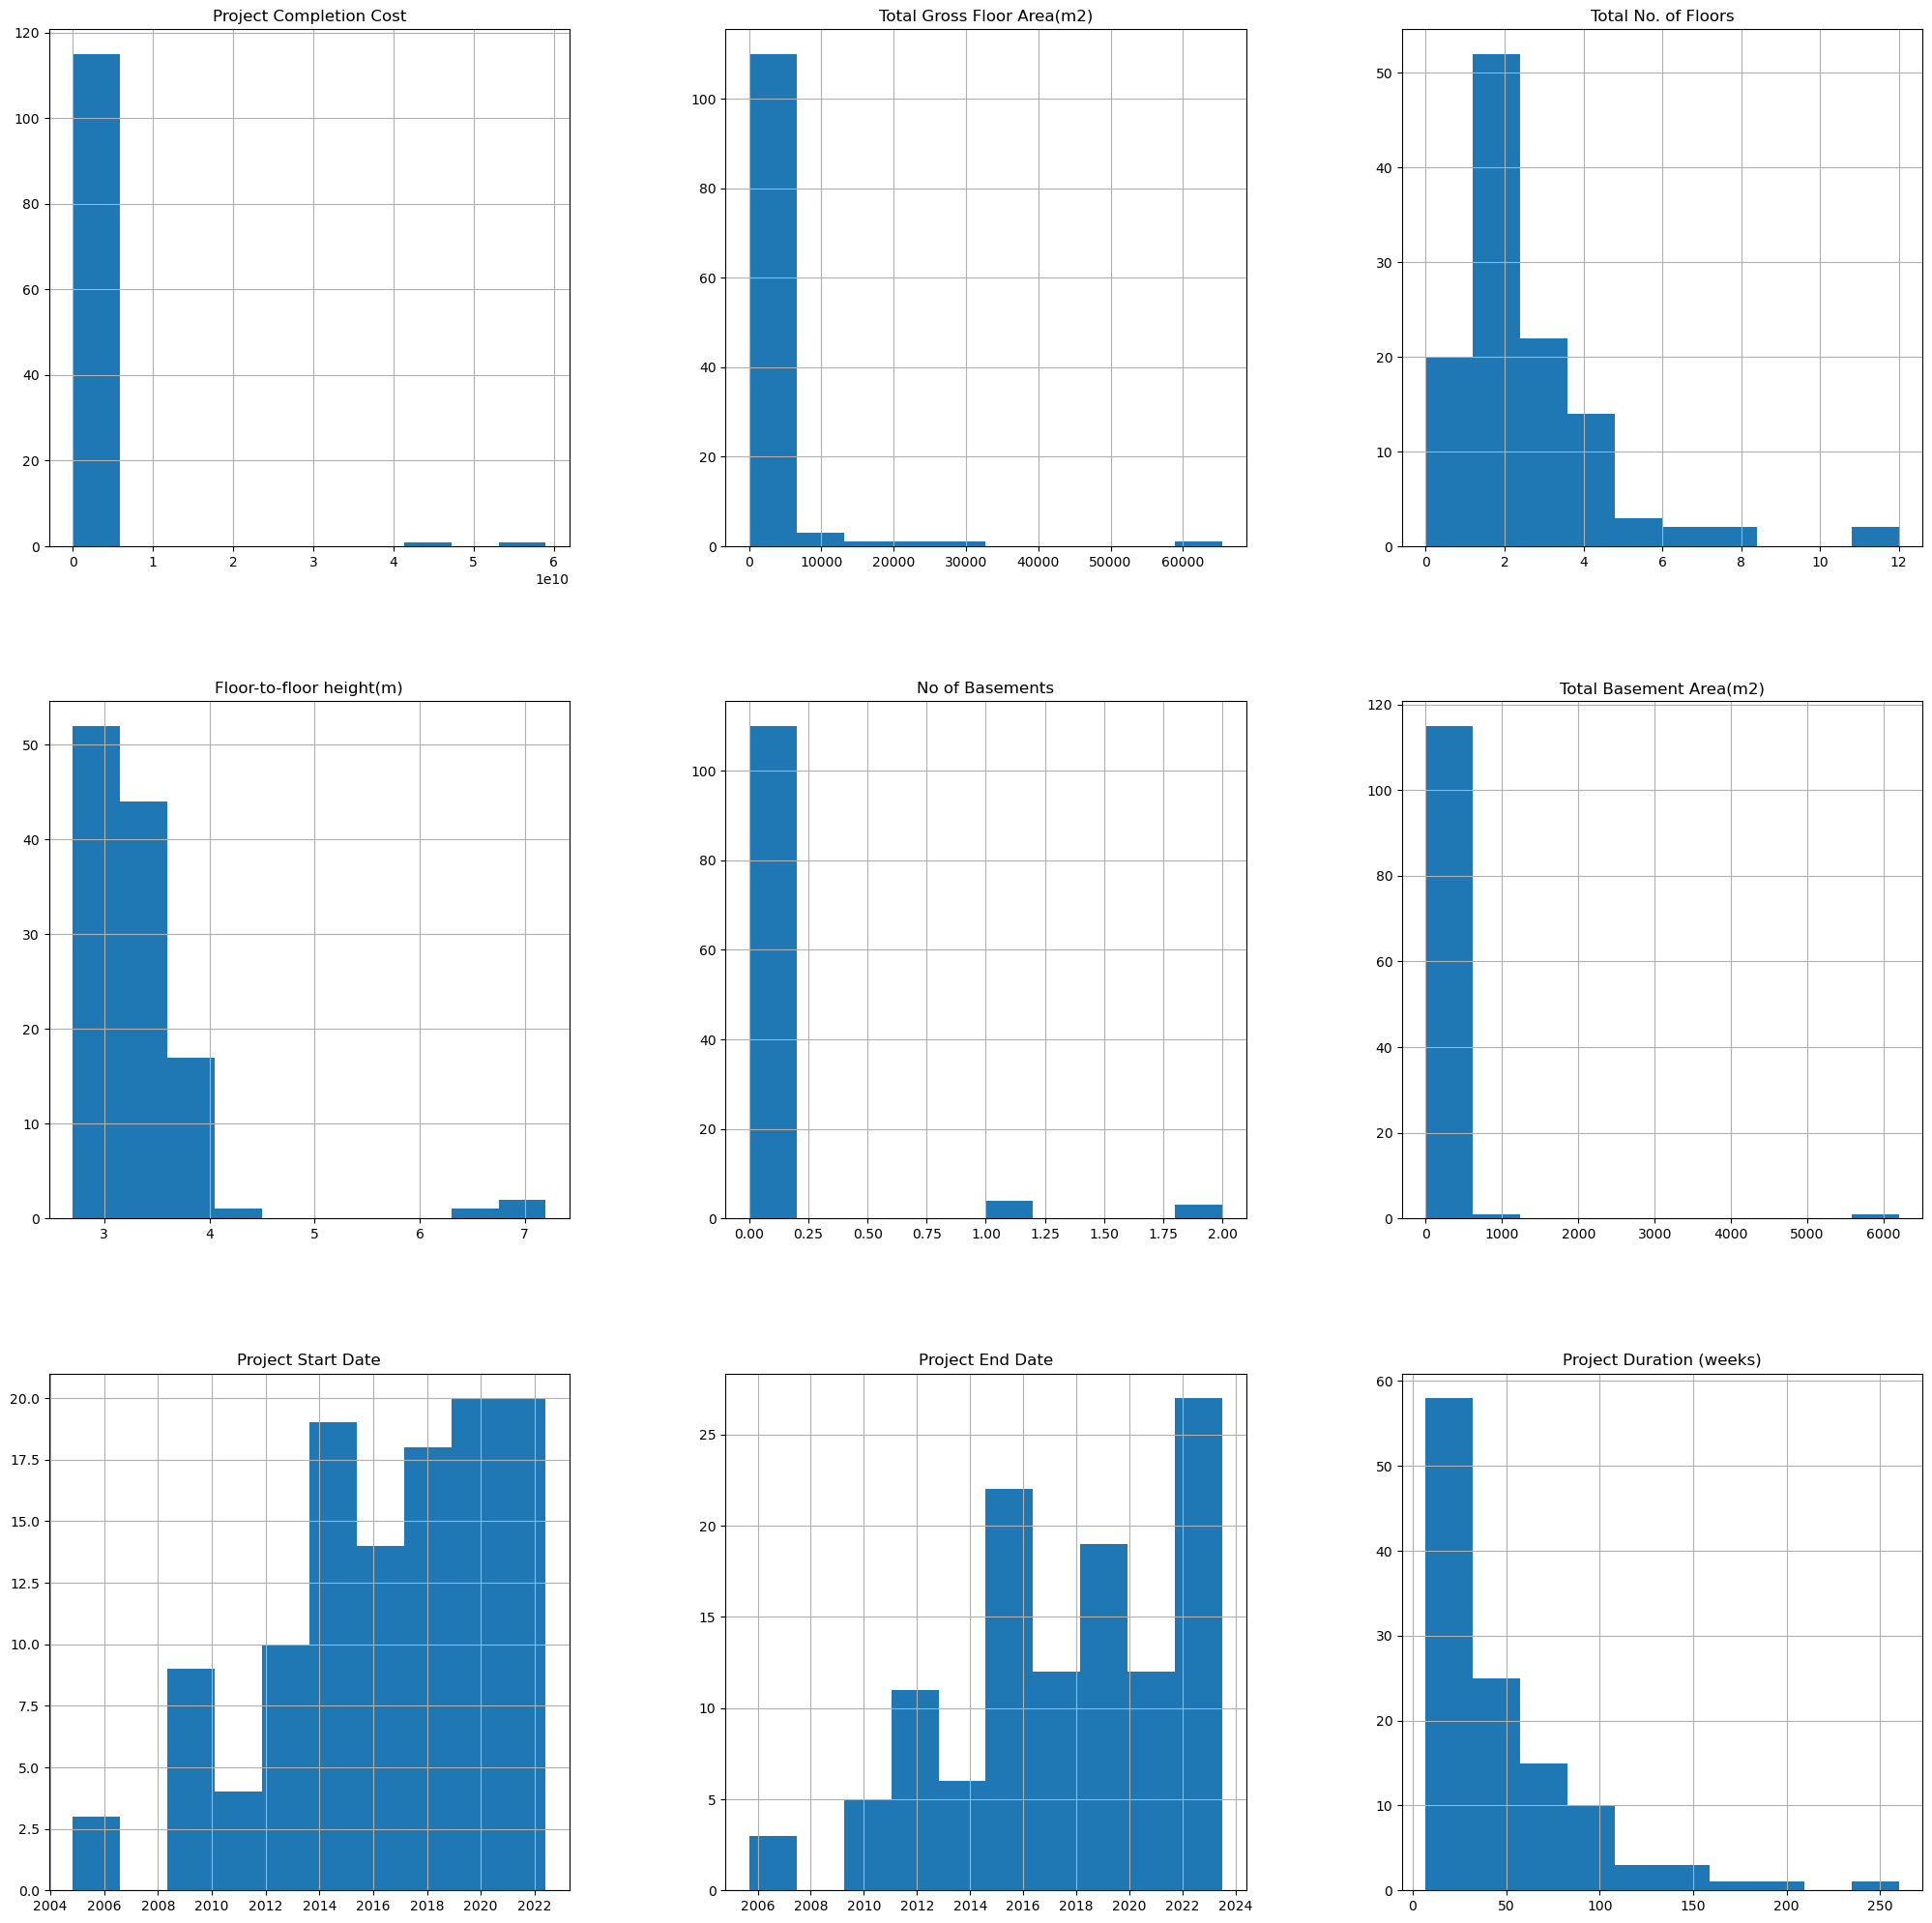

In [19]:
constr_df_2.hist(figsize = (25,25))
plt.show()

Text(0.5, 0, 'Construction Project Costs')

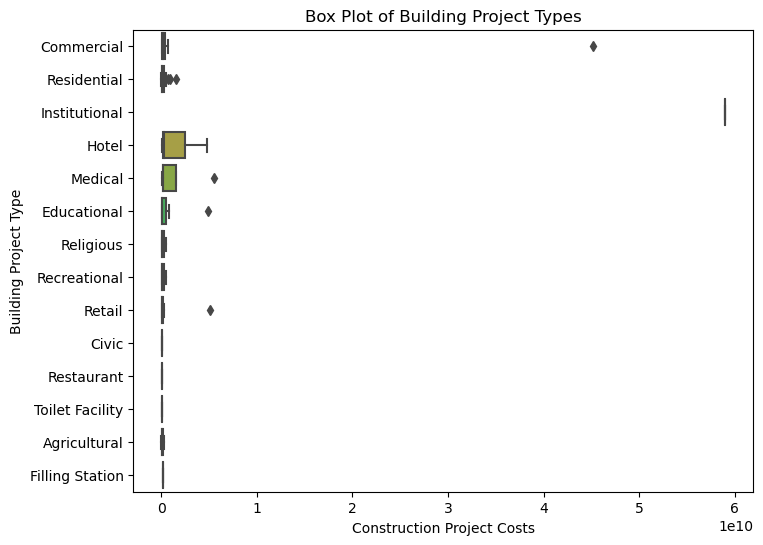

In [20]:
plt.figure(figsize=(8,6))
sns.boxplot(data=constr_df_2,x='Project Completion Cost',y='Project Type',);
plt.title('Box Plot of Building Project Types')
plt.ylabel('Building Project Type')
plt.xlabel('Construction Project Costs')

Text(0.5, 0, 'Construction Costs - Billions (=N=)')

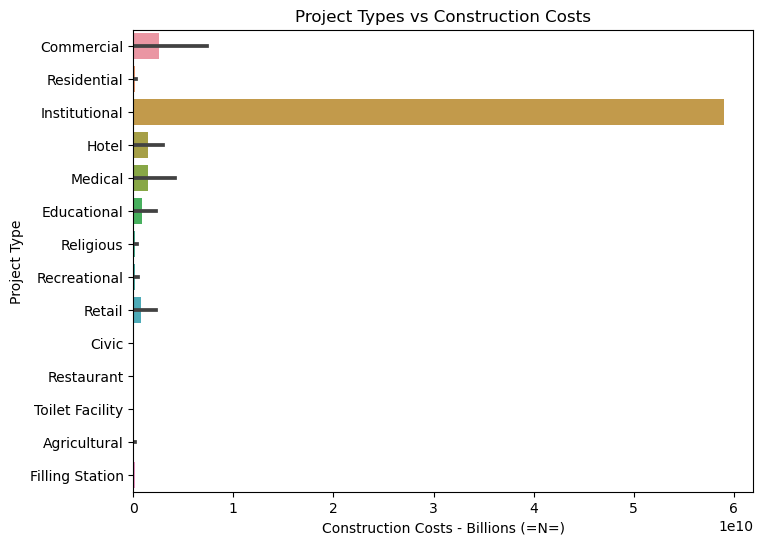

In [21]:
plt.figure(figsize=(8,6))
sns.barplot(data=constr_df_2,x='Project Completion Cost',y='Project Type');
plt.title('Project Types vs Construction Costs')
plt.ylabel('Project Type')
plt.xlabel('Construction Costs - Billions (=N=)')

Text(0.5, 0, 'Frequency')

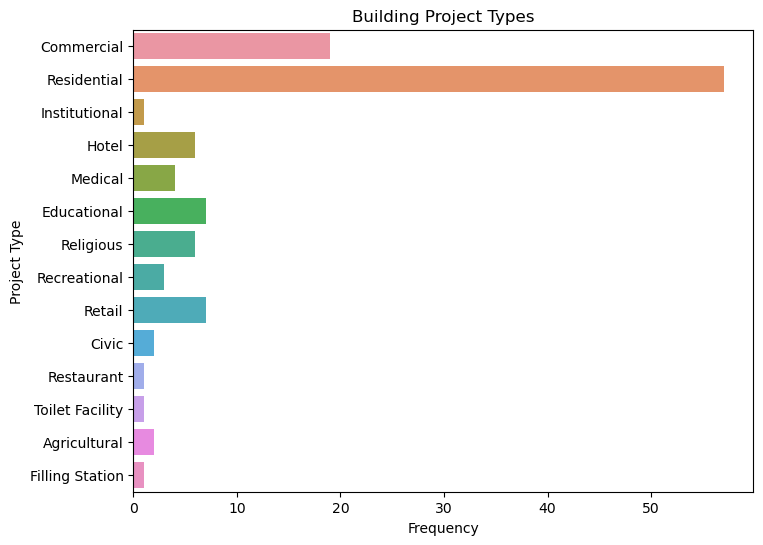

In [22]:
plt.figure(figsize=(8,6))
sns.countplot(data=constr_df_2,y='Project Type');
plt.title('Building Project Types')
plt.ylabel('Project Type')
plt.xlabel('Frequency')

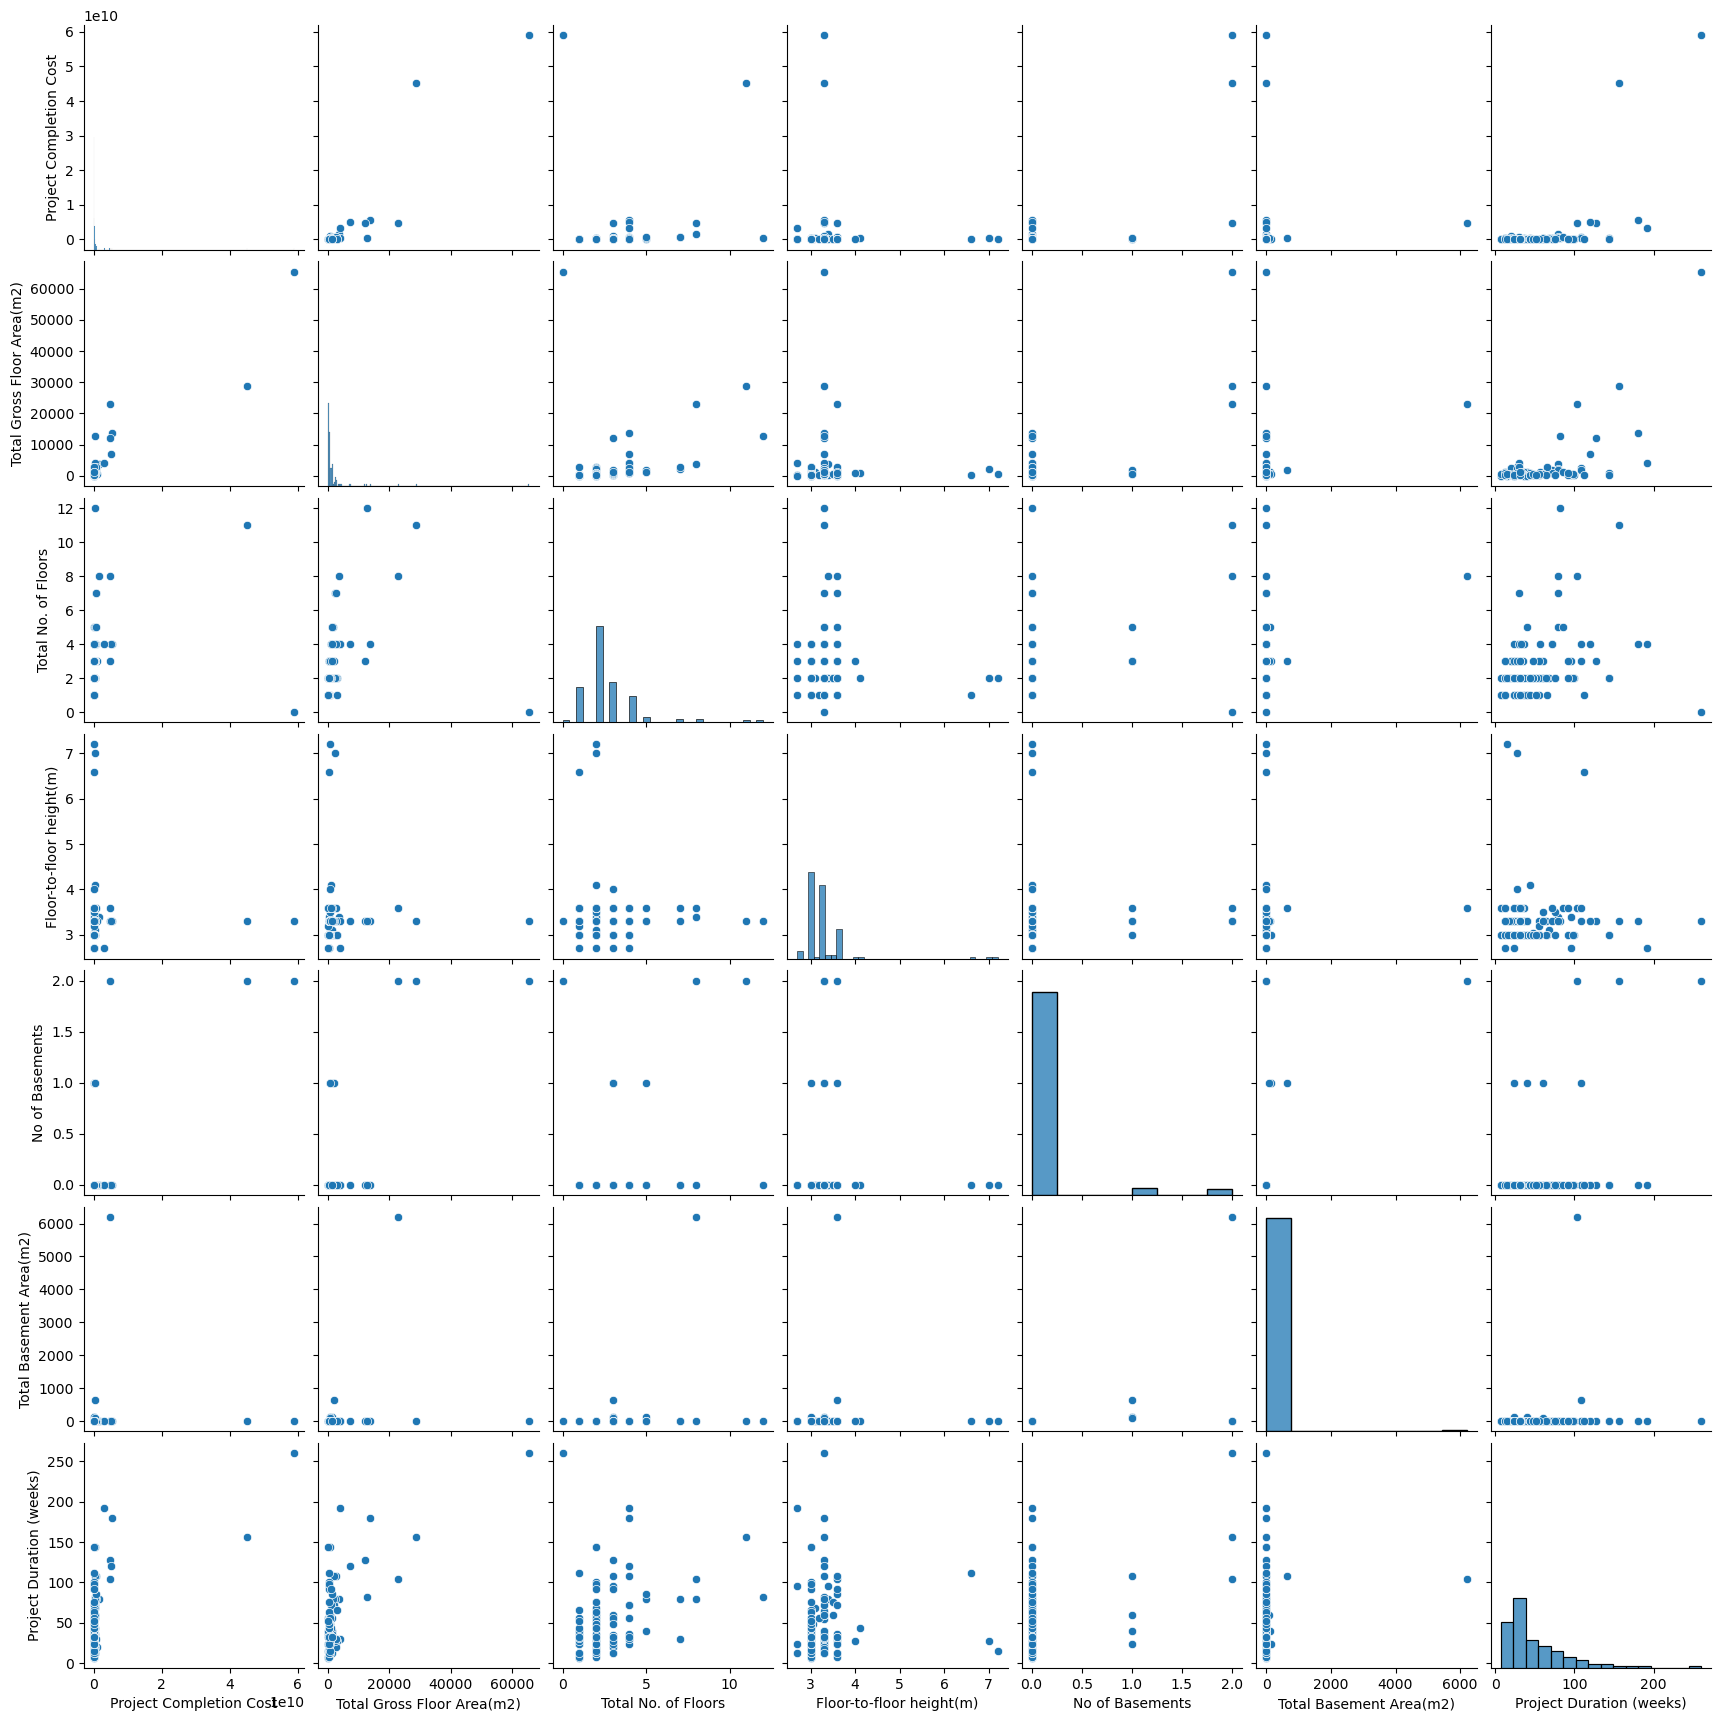

In [23]:
sns.pairplot(constr_df_2)

C:\Users\ADESOYE ADEOYE\AppData\Local\Temp\ipykernel_3536\3477279491.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(constr_df_2.corr(),annot=True)


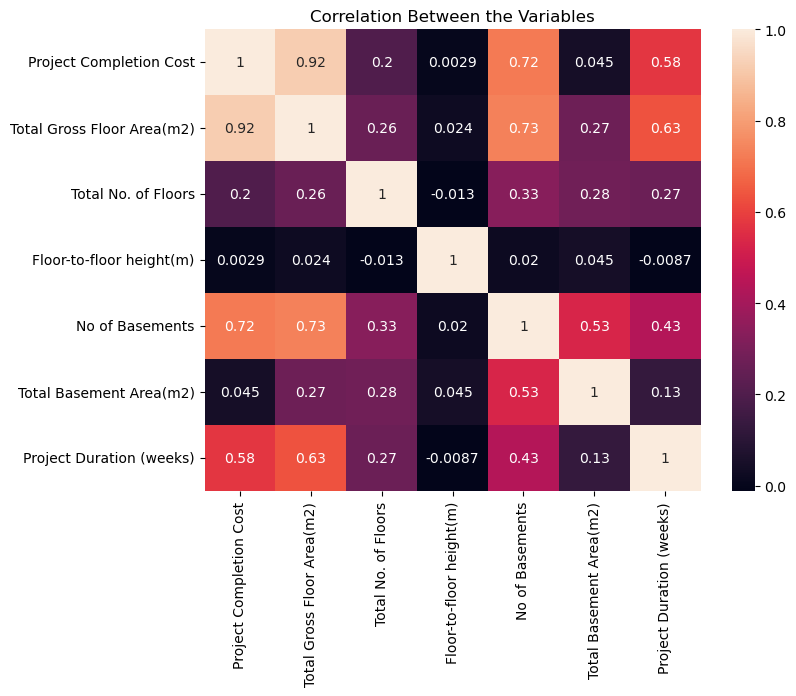

In [24]:
plt.figure(figsize=(8,6))
sns.heatmap(constr_df_2.corr(),annot=True)
plt.title('Correlation Between the Variables')
plt.show()

## Machine Learning stage ##

### Label encoding ###
This converts categorical variables into numerical in preparation for machine learning (ml) processing

In [25]:
constr_df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Project Type                117 non-null    object        
 1   Project Completion Cost     117 non-null    float64       
 2   Total Gross Floor Area(m2)  117 non-null    float64       
 3   Total No. of Floors         117 non-null    int64         
 4   Floor-to-floor height(m)    117 non-null    float64       
 5   No of Basements             117 non-null    int64         
 6   Total Basement Area(m2)     117 non-null    float64       
 7   Project Start Date          117 non-null    datetime64[ns]
 8   Project End Date            117 non-null    datetime64[ns]
 9   Project Duration (weeks)    117 non-null    float64       
dtypes: datetime64[ns](2), float64(5), int64(2), object(1)
memory usage: 9.3+ KB


In [26]:
#Label encoding technique adopted is to first convert object to categorical
#2nd step is to convert categorical to numerical
constr_df_2['Project Type'] = constr_df_2['Project Type'].astype('category')

In [27]:
constr_df_2['Project Type'] = constr_df_2['Project Type'].cat.codes
constr_df_2.head()

,Project Type,Project Completion Cost,Total Gross Floor Area(m2),Total No. of Floors,Floor-to-floor height(m),No of Basements,Total Basement Area(m2),Project Start Date,Project End Date,Project Duration (weeks)
0,2,7.490000e+07,648.000,3,3.311667,0,0.0,2017-02-10,2018-03-01,54.857143
1,10,5.825050e+07,765.510,2,3.311667,0,0.0,2018-10-29,2019-04-15,24.000000
2,10,7.186364e+07,593.447,2,3.311667,0,0.0,2019-04-14,2019-09-01,20.000000
3,10,1.486500e+09,3672.200,8,3.400000,0,0.0,2020-01-21,2021-08-03,80.000000
4,6,5.900000e+10,65455.000,0,3.311667,2,0.0,2018-05-14,2023-05-08,260.000000


In [28]:
constr_df_2.groupby('Project Type')['Project Type'].agg('count')

Project Type
0      2
1      2
2     19
3      7
4      1
5      6
6      1
7      4
8      3
9      6
10    57
11     1
12     7
13     1
Name: Project Type, dtype: int64

In [29]:
#The dependent or 'Target' column is 'Project Completion Cost ' and the others are the independent variables.
X = constr_df_2[['Project Type','Total Gross Floor Area(m2)','Total No. of Floors','Floor-to-floor height(m)',
                 'No of Basements','Total Basement Area(m2)','Project Duration (weeks)']]

y = constr_df_2['Project Completion Cost']

In [30]:
#Import required machine learning libraries
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split

In [31]:
#Split the dataset into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=52, train_size = .70)

In [32]:
#Build an instance of the model
cost_model = LinearRegression()

In [33]:
# Fit the model to the training dataset
cost_model.fit(X_train, y_train)

LinearRegression()

In [34]:
#Get the intercept of the model
print('Intercept: ', cost_model.intercept_)

Intercept:  643765794.6622953


In [35]:
#Coefficients of the variables
coeff_df = pd.DataFrame(cost_model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Project Type,-4.269132e+07
Total Gross Floor Area(m2),8.736727e+05
Total No. of Floors,-3.357190e+08
Floor-to-floor height(m),-6.903728e+07
No of Basements,8.495970e+09
Total Basement Area(m2),-4.793908e+06
Project Duration (weeks),-3.170485e+06


In [36]:
# Make predictions on the train and test sets
y_pred_cost = cost_model.predict(X_test)

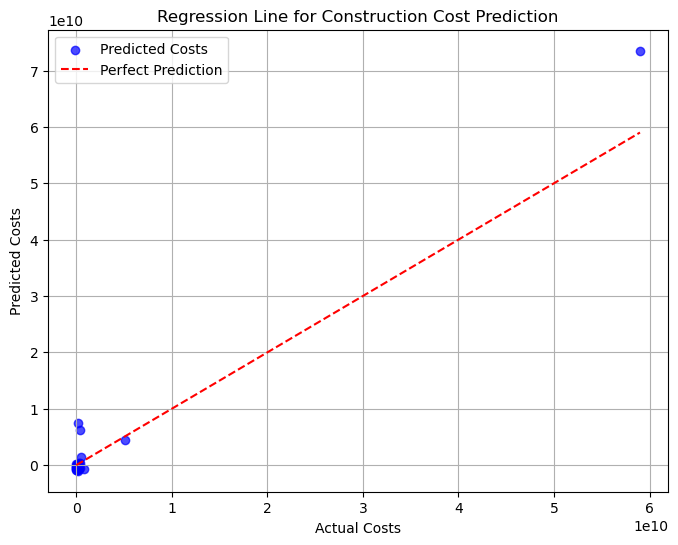

In [37]:
# Plot showing Predicted Costs vs Actual Costs
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_cost, label="Predicted Costs", color="blue", alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle="--", color="red", label="Perfect Prediction")
plt.xlabel("Actual Costs")
plt.ylabel("Predicted Costs")
plt.title("Regression Line for Construction Cost Prediction")
plt.legend()
plt.grid(True)
plt.show()

C:\Users\ADESOYE ADEOYE\AppData\Local\Temp\ipykernel_3536\4065575376.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-y_pred_cost),bins=50);


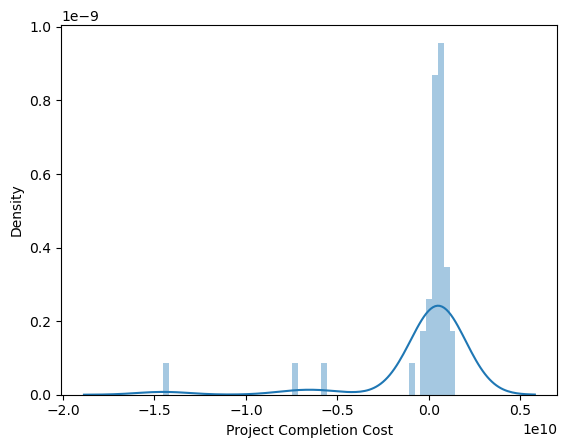

In [38]:
sns.distplot((y_test-y_pred_cost),bins=50);

In [39]:
#Actual value and the predicted value
cost_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_cost})
cost_model_diff

,Actual value,Predicted value
18,2.726191e+08,-6.234625e+08
19,3.512849e+08,-4.301499e+08
113,6.925500e+07,-5.670082e+08
105,3.118513e+07,-8.289070e+08
2,7.186364e+07,-2.281452e+08
112,1.392125e+08,-2.907859e+07
21,1.453704e+08,-7.544860e+07
57,8.737520e+07,-7.236824e+08
52,6.400000e+07,-6.927173e+08
101,1.600000e+08,-2.345561e+08


## Evaluating the Model ##

In [40]:
print("R2:", (metrics.r2_score(y_test,y_pred_cost)))

R2: 0.907705296217235


In [41]:
# Evaluate the model
print("Mean Square Error:", (metrics.mean_squared_error(y_test,y_pred_cost)))
print("Mean Absolute Error:", (metrics.mean_absolute_error(y_test,y_pred_cost)))

Mean Square Error: 8.650287548409665e+18
Mean Absolute Error: 1294946376.8851628


## Cost predictions using new data

In [117]:
new_data = pd.DataFrame({'Project Type': [3],'Total Gross Floor Area(m2)': [2500],'Total No. of Floors': [3],
    'Floor-to-floor height(m)': [3.3],'No of Basements': [0],'Total Basement Area(m2)': [0],'Project Duration (weeks)':[40]})

In [118]:
new_data

,Project Type,Total Gross Floor Area(m2),Total No. of Floors,Floor-to-floor height(m),No of Basements,Total Basement Area(m2),Project Duration (weeks)
0,3,2500,3,3.3,0,0,40


In [119]:
# Make predictions using the linear regression model
predicted_costs = cost_model.predict(new_data)
predicted_costs

array([1.33807405e+09])

In [103]:
new_data_2 = pd.read_csv("D:/ADESOYE'S DOCUMENTS/NTU SCHOOL WORK/MSC PROJECT/Collated_Construction_Information_New_data2.csv")

In [104]:
new_data_2

,Project Type,Total Gross Floor Area(m2),Total No. of Floors,Floor-to-floor height(m),No of Basements,Total Basement Area(m2),Project Duration (weeks)
0,10,172.14,1,3.0,0,0.00,8
1,10,507.30,2,3.3,0,0.00,16
2,10,1150.06,3,3.8,1,215.78,24
3,10,777.48,2,3.3,0,0.00,46
4,10,522.91,3,3.3,1,151.52,88
5,10,355.40,3,3.0,0,0.00,120
6,10,483.07,2,3.3,0,0.00,52
7,2,30000.00,11,3.6,1,1500.00,240
8,2,18000.00,5,3.0,1,3600.00,54
9,2,48000.00,12,3.6,1,4000.00,144


In [105]:
new_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Project Type                11 non-null     int64  
 1   Total Gross Floor Area(m2)  11 non-null     float64
 2   Total No. of Floors         11 non-null     int64  
 3   Floor-to-floor height(m)    11 non-null     float64
 4   No of Basements             11 non-null     int64  
 5   Total Basement Area(m2)     11 non-null     float64
 6   Project Duration (weeks)    11 non-null     int64  
dtypes: float64(3), int64(4)
memory usage: 744.0 bytes


In [106]:
predicted_costs_2 = cost_model.predict(new_data_2)
predicted_costs_2

array([-2.00948179e+08, -2.89922134e+08,  7.33757856e+09, -1.48987801e+08,
        6.92931883e+09, -1.06737134e+09, -4.25228694e+08,  2.33713123e+10,
        5.46548013e+09,  2.70812989e+10,  1.48377439e+09])

In [107]:
print('Predicted Costs:', predicted_costs_2)

Predicted Costs: [-2.00948179e+08 -2.89922134e+08  7.33757856e+09 -1.48987801e+08
  6.92931883e+09 -1.06737134e+09 -4.25228694e+08  2.33713123e+10
  5.46548013e+09  2.70812989e+10  1.48377439e+09]


In [109]:
actual_costs = np.array([55084800.00, 162336000.00, 368019200.00, 213807000.00, 305902350.00, 37317000.00, 152167050.00,
                         9800000000.00, 1200000000.00, 100000000000.00, 1200000000.00])

mae = mean_absolute_error(actual_costs, predicted_costs_2)
mse = mean_squared_error(actual_costs, predicted_costs_2)
r2 = r2_score(actual_costs, predicted_costs_2)

print("MAE:", mae)
print("MSE:", mse)
print("R-squared:", r2)

MAE: 9762310343.184275
MSE: 5.103629251460691e+20
R-squared: 0.3712099419261412
